In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns #data visualization
sns.set_style("white")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
Book_Data = pd.read_csv("Harry_Potter_Scraped_Dataset.csv")
Book_Data

,Book Name,Copies Sold in UK,Copies Sold WorldWide,Publish Date,Publish Month,Publish Year,Pages,Words,Audiobook,Total Awards Won
0,Harry Potter and the Sorcerer’s Stone,4.2,120,26,June,1997,223,"76,944",9 hrs and 33 mins,8
1,Harry Potter and the Chamber of Secrets,3.5,77,2,July,1998,251,"85,141",11 hrs and 5 mins,5
2,Harry Potter and the Prisoner of Azkaban,3.4,65,8,July,1999,317,"107,253",13 hrs and 10 mins,3
3,Harry Potter and the Goblet of Fire,3.6,65,8,July,2000,636,"190,637",22 hrs and 17 mins,1
4,Harry Potter and the Order of the Phoenix,4.2,65,21,June,2003,766,"257,045",30 hrs and 18 mins,1
5,Harry Potter and the Half-blood Prince,4.1,65,16,July,2005,607,"168,923",21 hrs and 27 mins,1
6,Harry Potter and the Deathly Hallows,4.5,65,21,July,2007,607,"198,227",24 hrs,0


In [4]:
#shape of the dataset
print("Shape of the dataset is",Book_Data.shape)

Shape of the dataset is (7, 10)


In [5]:
#information about the dataset
Book_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Book Name              7 non-null      object 
 1   Copies Sold in UK      7 non-null      float64
 2   Copies Sold WorldWide  7 non-null      int64  
 3   Publish Date           7 non-null      int64  
 4   Publish Month          7 non-null      object 
 5   Publish Year           7 non-null      int64  
 6   Pages                  7 non-null      int64  
 7   Words                  7 non-null      object 
 8   Audiobook              7 non-null      object 
 9   Total Awards Won       7 non-null      int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 688.0+ bytes


**Insight:**

There are 10 columns in the dataset.
* 6 columns are Numerical datatype.
* 4 are Object datatype.
* Also, there are no NULL values in it.

In [6]:
#checking for null values to comfirm that there are no NULL values in it.
Book_Data.isna().value_counts()

Book Name  Copies Sold in UK  Copies Sold WorldWide  Publish Date  Publish Month  Publish Year  Pages  Words  Audiobook  Total Awards Won
False      False              False                  False         False          False         False  False  False      False               7
dtype: int64

In [7]:
Book_Data

,Book Name,Copies Sold in UK,Copies Sold WorldWide,Publish Date,Publish Month,Publish Year,Pages,Words,Audiobook,Total Awards Won
0,Harry Potter and the Sorcerer’s Stone,4.2,120,26,June,1997,223,"76,944",9 hrs and 33 mins,8
1,Harry Potter and the Chamber of Secrets,3.5,77,2,July,1998,251,"85,141",11 hrs and 5 mins,5
2,Harry Potter and the Prisoner of Azkaban,3.4,65,8,July,1999,317,"107,253",13 hrs and 10 mins,3
3,Harry Potter and the Goblet of Fire,3.6,65,8,July,2000,636,"190,637",22 hrs and 17 mins,1
4,Harry Potter and the Order of the Phoenix,4.2,65,21,June,2003,766,"257,045",30 hrs and 18 mins,1
5,Harry Potter and the Half-blood Prince,4.1,65,16,July,2005,607,"168,923",21 hrs and 27 mins,1
6,Harry Potter and the Deathly Hallows,4.5,65,21,July,2007,607,"198,227",24 hrs,0


In [8]:
"""Changing the name of the columns.
Copies Sold in UK to Copies Sold in UK in millions
Copies Sold WorldWide to Copies Sold WorldWide in millions"""

Book_Data.rename(columns = {"Copies Sold in UK" : "Copies Sold in UK in millions",
                           "Copies Sold WorldWide" : "Copies Sold WorldWide in millions"}, inplace = True)

Book_Data

,Book Name,Copies Sold in UK in millions,Copies Sold WorldWide in millions,Publish Date,Publish Month,Publish Year,Pages,Words,Audiobook,Total Awards Won
0,Harry Potter and the Sorcerer’s Stone,4.2,120,26,June,1997,223,"76,944",9 hrs and 33 mins,8
1,Harry Potter and the Chamber of Secrets,3.5,77,2,July,1998,251,"85,141",11 hrs and 5 mins,5
2,Harry Potter and the Prisoner of Azkaban,3.4,65,8,July,1999,317,"107,253",13 hrs and 10 mins,3
3,Harry Potter and the Goblet of Fire,3.6,65,8,July,2000,636,"190,637",22 hrs and 17 mins,1
4,Harry Potter and the Order of the Phoenix,4.2,65,21,June,2003,766,"257,045",30 hrs and 18 mins,1
5,Harry Potter and the Half-blood Prince,4.1,65,16,July,2005,607,"168,923",21 hrs and 27 mins,1
6,Harry Potter and the Deathly Hallows,4.5,65,21,July,2007,607,"198,227",24 hrs,0


In [9]:
Book_Data

,Book Name,Copies Sold in UK in millions,Copies Sold WorldWide in millions,Publish Date,Publish Month,Publish Year,Pages,Words,Audiobook,Total Awards Won
0,Harry Potter and the Sorcerer’s Stone,4.2,120,26,June,1997,223,"76,944",9 hrs and 33 mins,8
1,Harry Potter and the Chamber of Secrets,3.5,77,2,July,1998,251,"85,141",11 hrs and 5 mins,5
2,Harry Potter and the Prisoner of Azkaban,3.4,65,8,July,1999,317,"107,253",13 hrs and 10 mins,3
3,Harry Potter and the Goblet of Fire,3.6,65,8,July,2000,636,"190,637",22 hrs and 17 mins,1
4,Harry Potter and the Order of the Phoenix,4.2,65,21,June,2003,766,"257,045",30 hrs and 18 mins,1
5,Harry Potter and the Half-blood Prince,4.1,65,16,July,2005,607,"168,923",21 hrs and 27 mins,1
6,Harry Potter and the Deathly Hallows,4.5,65,21,July,2007,607,"198,227",24 hrs,0


In [10]:
Book_Data.describe()

,Copies Sold in UK in millions,Copies Sold WorldWide in millions,Publish Date,Publish Year,Pages,Total Awards Won
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,3.928571,74.571429,14.571429,2001.285714,486.714286,2.714286
std,0.423140,20.525246,8.753231,3.773340,217.230073,2.870208
min,3.400000,65.000000,2.000000,1997.000000,223.000000,0.000000
25%,3.550000,65.000000,8.000000,1998.500000,284.000000,1.000000
50%,4.100000,65.000000,16.000000,2000.000000,607.000000,1.000000
75%,4.200000,71.000000,21.000000,2004.000000,621.500000,4.000000
max,4.500000,120.000000,26.000000,2007.000000,766.000000,8.000000


In [11]:
Book_Data

,Book Name,Copies Sold in UK in millions,Copies Sold WorldWide in millions,Publish Date,Publish Month,Publish Year,Pages,Words,Audiobook,Total Awards Won
0,Harry Potter and the Sorcerer’s Stone,4.2,120,26,June,1997,223,"76,944",9 hrs and 33 mins,8
1,Harry Potter and the Chamber of Secrets,3.5,77,2,July,1998,251,"85,141",11 hrs and 5 mins,5
2,Harry Potter and the Prisoner of Azkaban,3.4,65,8,July,1999,317,"107,253",13 hrs and 10 mins,3
3,Harry Potter and the Goblet of Fire,3.6,65,8,July,2000,636,"190,637",22 hrs and 17 mins,1
4,Harry Potter and the Order of the Phoenix,4.2,65,21,June,2003,766,"257,045",30 hrs and 18 mins,1
5,Harry Potter and the Half-blood Prince,4.1,65,16,July,2005,607,"168,923",21 hrs and 27 mins,1
6,Harry Potter and the Deathly Hallows,4.5,65,21,July,2007,607,"198,227",24 hrs,0


In [12]:
Book_Data["Copies Sold in UK in millions"]

0    4.2
1    3.5
2    3.4
3    3.6
4    4.2
5    4.1
6    4.5
Name: Copies Sold in UK in millions, dtype: float64

In [13]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


<Axes: title={'center': 'Copies Sold in UK'}, xlabel='Copies Sold in UK in millions', ylabel='Book Name'>

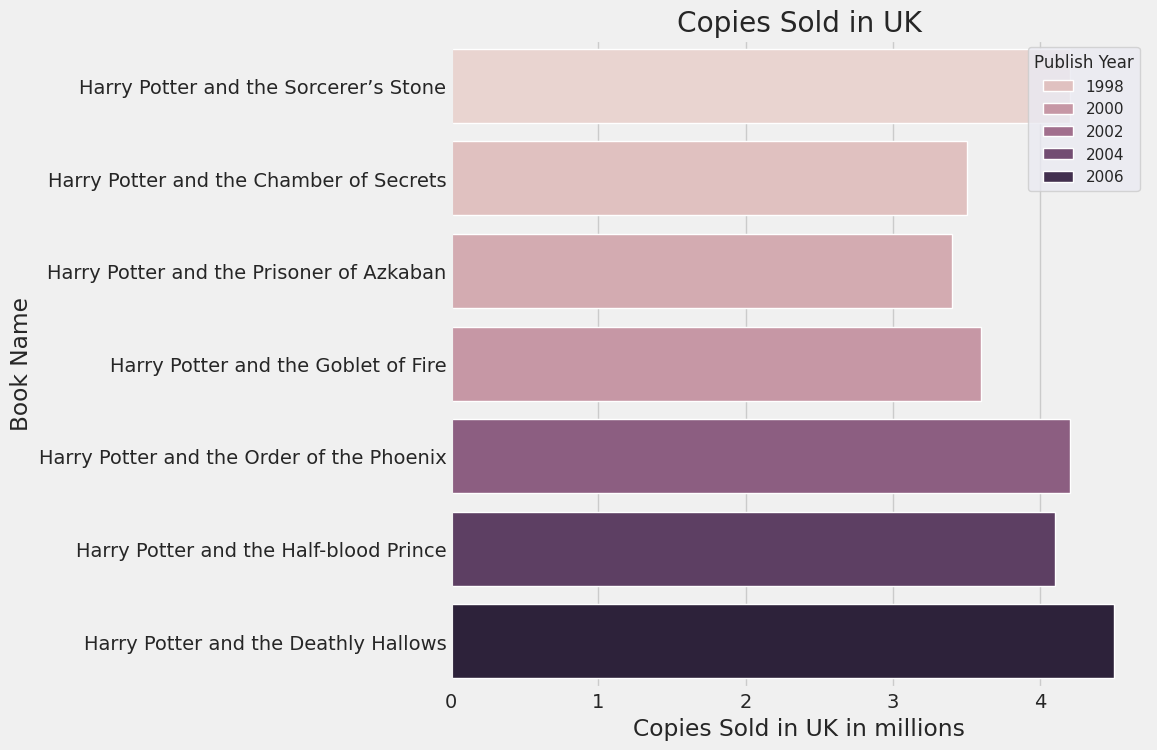

In [14]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(8,8))
plt.title("Copies Sold in UK")
sns.set(font_scale=1)
sns.barplot(data=Book_Data, x="Copies Sold in UK in millions", y="Book Name",hue="Publish Year")

In [15]:
Book_Data

,Book Name,Copies Sold in UK in millions,Copies Sold WorldWide in millions,Publish Date,Publish Month,Publish Year,Pages,Words,Audiobook,Total Awards Won
0,Harry Potter and the Sorcerer’s Stone,4.2,120,26,June,1997,223,"76,944",9 hrs and 33 mins,8
1,Harry Potter and the Chamber of Secrets,3.5,77,2,July,1998,251,"85,141",11 hrs and 5 mins,5
2,Harry Potter and the Prisoner of Azkaban,3.4,65,8,July,1999,317,"107,253",13 hrs and 10 mins,3
3,Harry Potter and the Goblet of Fire,3.6,65,8,July,2000,636,"190,637",22 hrs and 17 mins,1
4,Harry Potter and the Order of the Phoenix,4.2,65,21,June,2003,766,"257,045",30 hrs and 18 mins,1
5,Harry Potter and the Half-blood Prince,4.1,65,16,July,2005,607,"168,923",21 hrs and 27 mins,1
6,Harry Potter and the Deathly Hallows,4.5,65,21,July,2007,607,"198,227",24 hrs,0


In [16]:
Book_Data["Copies Sold WorldWide in millions"]

0    120
1     77
2     65
3     65
4     65
5     65
6     65
Name: Copies Sold WorldWide in millions, dtype: int64

<Axes: title={'center': 'Copies Sold in Worldwide'}, xlabel='Copies Sold WorldWide in millions', ylabel='Book Name'>

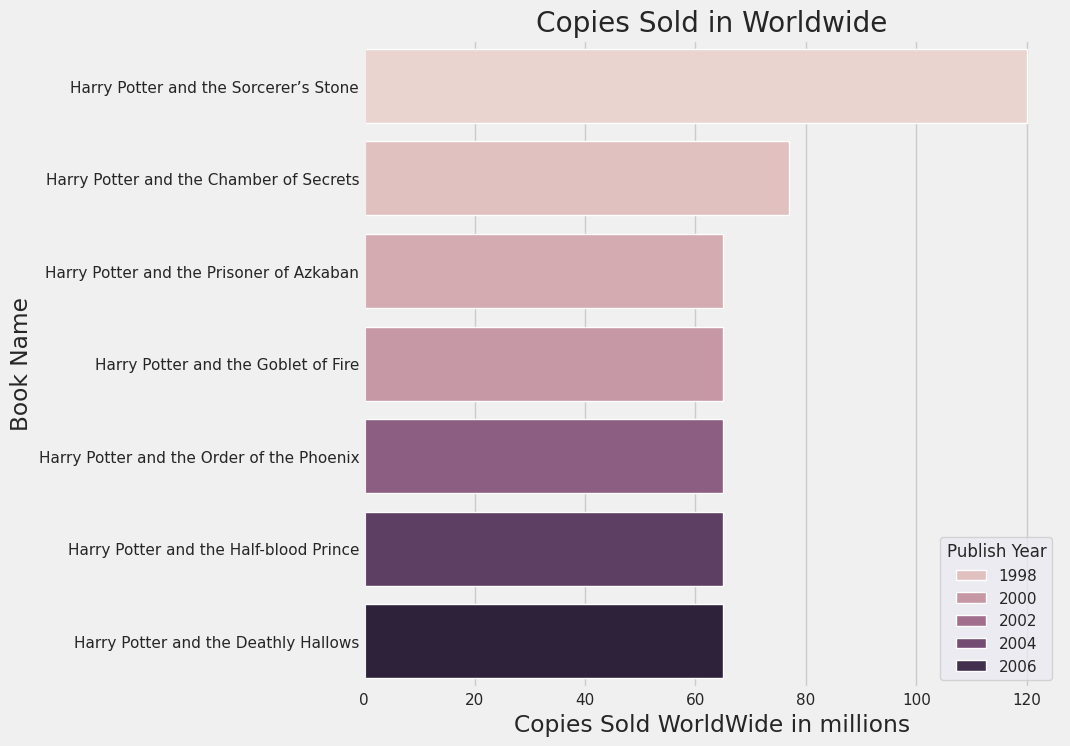

In [17]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(8,8))
plt.title("Copies Sold in Worldwide")
sns.set(font_scale=1)
sns.barplot(data=Book_Data, x="Copies Sold WorldWide in millions", y="Book Name",hue="Publish Year")

In [18]:
Book_Data

,Book Name,Copies Sold in UK in millions,Copies Sold WorldWide in millions,Publish Date,Publish Month,Publish Year,Pages,Words,Audiobook,Total Awards Won
0,Harry Potter and the Sorcerer’s Stone,4.2,120,26,June,1997,223,"76,944",9 hrs and 33 mins,8
1,Harry Potter and the Chamber of Secrets,3.5,77,2,July,1998,251,"85,141",11 hrs and 5 mins,5
2,Harry Potter and the Prisoner of Azkaban,3.4,65,8,July,1999,317,"107,253",13 hrs and 10 mins,3
3,Harry Potter and the Goblet of Fire,3.6,65,8,July,2000,636,"190,637",22 hrs and 17 mins,1
4,Harry Potter and the Order of the Phoenix,4.2,65,21,June,2003,766,"257,045",30 hrs and 18 mins,1
5,Harry Potter and the Half-blood Prince,4.1,65,16,July,2005,607,"168,923",21 hrs and 27 mins,1
6,Harry Potter and the Deathly Hallows,4.5,65,21,July,2007,607,"198,227",24 hrs,0


<Axes: title={'center': 'Pages in a Book'}, xlabel='Pages', ylabel='Book Name'>

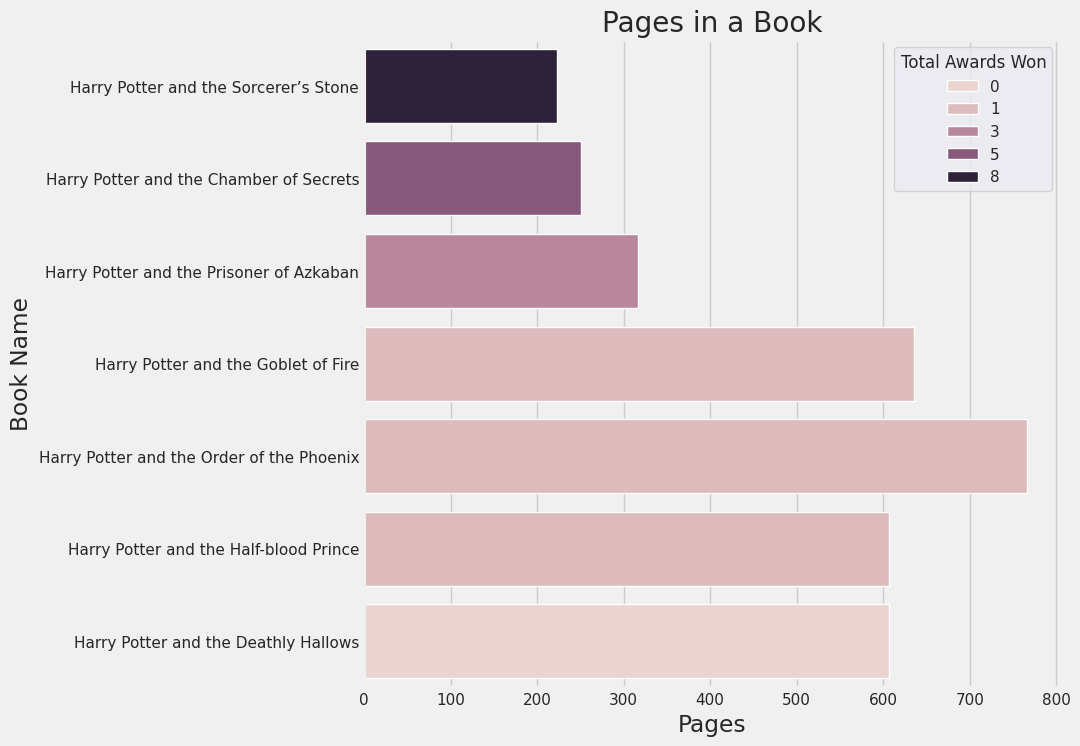

In [19]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(8,8))
plt.title("Pages in a Book")
sns.set(font_scale=1)
sns.barplot(data=Book_Data, y="Book Name", x="Pages",hue="Total Awards Won")

In [20]:
Book_Data

,Book Name,Copies Sold in UK in millions,Copies Sold WorldWide in millions,Publish Date,Publish Month,Publish Year,Pages,Words,Audiobook,Total Awards Won
0,Harry Potter and the Sorcerer’s Stone,4.2,120,26,June,1997,223,"76,944",9 hrs and 33 mins,8
1,Harry Potter and the Chamber of Secrets,3.5,77,2,July,1998,251,"85,141",11 hrs and 5 mins,5
2,Harry Potter and the Prisoner of Azkaban,3.4,65,8,July,1999,317,"107,253",13 hrs and 10 mins,3
3,Harry Potter and the Goblet of Fire,3.6,65,8,July,2000,636,"190,637",22 hrs and 17 mins,1
4,Harry Potter and the Order of the Phoenix,4.2,65,21,June,2003,766,"257,045",30 hrs and 18 mins,1
5,Harry Potter and the Half-blood Prince,4.1,65,16,July,2005,607,"168,923",21 hrs and 27 mins,1
6,Harry Potter and the Deathly Hallows,4.5,65,21,July,2007,607,"198,227",24 hrs,0


In [21]:
Book_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Book Name                          7 non-null      object 
 1   Copies Sold in UK in millions      7 non-null      float64
 2   Copies Sold WorldWide in millions  7 non-null      int64  
 3   Publish Date                       7 non-null      int64  
 4   Publish Month                      7 non-null      object 
 5   Publish Year                       7 non-null      int64  
 6   Pages                              7 non-null      int64  
 7   Words                              7 non-null      object 
 8   Audiobook                          7 non-null      object 
 9   Total Awards Won                   7 non-null      int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 688.0+ bytes


**Insight:**
Since column Words is an Object datatype we have to convert it into Numeric to Visualize it

In [22]:
# converting column "Words" of a DataFrame into Numeric
Book_Data['Words'] = Book_Data['Words'].str.replace(',', '').astype(float)

In [23]:
Book_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Book Name                          7 non-null      object 
 1   Copies Sold in UK in millions      7 non-null      float64
 2   Copies Sold WorldWide in millions  7 non-null      int64  
 3   Publish Date                       7 non-null      int64  
 4   Publish Month                      7 non-null      object 
 5   Publish Year                       7 non-null      int64  
 6   Pages                              7 non-null      int64  
 7   Words                              7 non-null      float64
 8   Audiobook                          7 non-null      object 
 9   Total Awards Won                   7 non-null      int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 688.0+ bytes


In [24]:
Book_Data["Words"]

0     76944.0
1     85141.0
2    107253.0
3    190637.0
4    257045.0
5    168923.0
6    198227.0
Name: Words, dtype: float64

<Axes: title={'center': 'Words in a Book'}, xlabel='Words', ylabel='Book Name'>

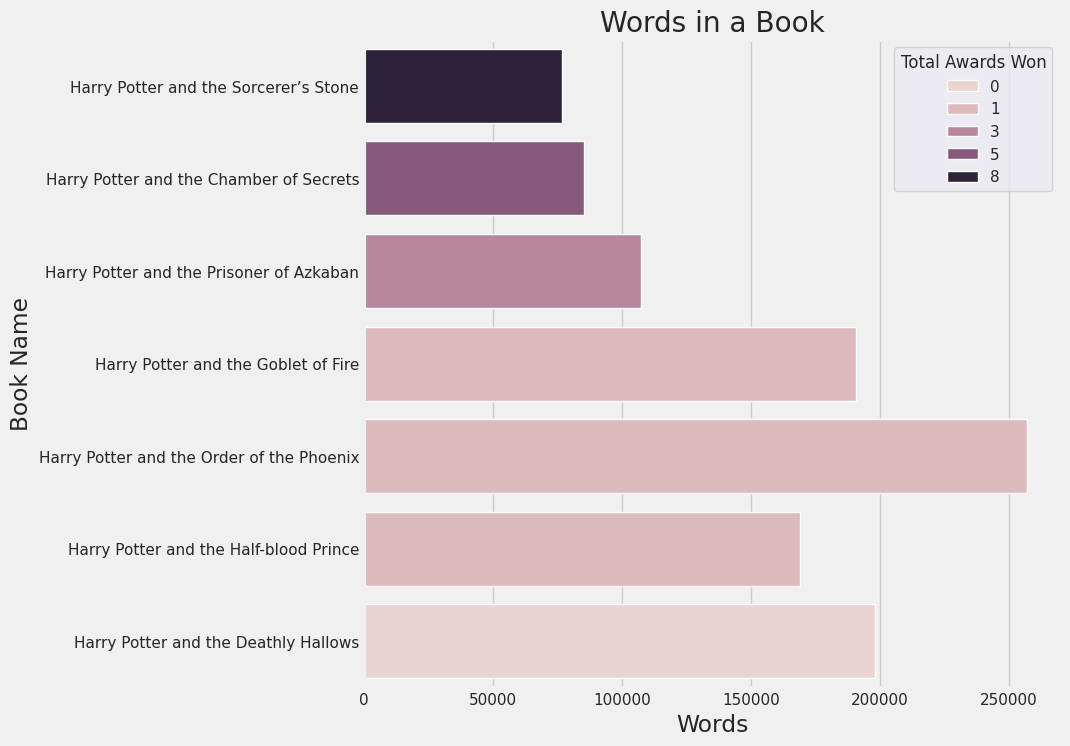

In [25]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(8,8))
plt.title("Words in a Book")
sns.set(font_scale=1)
sns.barplot(data=Book_Data, y="Book Name", x="Words",hue="Total Awards Won")